## Manual for reviewer

##### Part 1: Loading Data and initial EDA using mostly commands and written code without visualizing

##### Part 2: A lot of visualization, with brief explanations, exploring the data using visuals and giving brief explanation to what has been done and sometimes what the goal was to do but failed to. 

##### Part 3: The visuals id show to "stake holders" 

##### What else could have been done ?

1. If the courses had a date of release, it would have been possible to figure out if the courses with the highest enrollments have been out for the longest or if its newer courses that is more "popular". 

2. Does users finnish the courses ? There is no data for that. Whats the Course enrollment vs people who finish said course ? 




# Part 1:

### Load all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df = pd.read_csv("coursea_data.csv")

### Initial data exploration and cleaning

In [3]:
df.head(5)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [4]:
df.nunique()

Unnamed: 0                  891
course_title                888
course_organization         154
course_Certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
dtype: int64

In [5]:
print(f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


In [6]:
min, max = df["Unnamed: 0"].agg(["min", "max"])
unique = df["Unnamed: 0"].nunique()

print(
    f"The unnamed column has {unique} unique values, with a min = {min} and max = {max}"
)

The unnamed column has 891 unique values, with a min = 0 and max = 890


Making all column headers lower case, and renaming the unnamed: 0 column to nr and setting it as the index

In [7]:
# columns = df.columns.to_list()
df.columns = [x.lower() for x in df.columns]
df = df.rename(columns={"unnamed: 0": "nr"})
df.set_index("nr", inplace=True)

course student enrolled is a saved as a string value. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 134 to 163
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


Creating a float value from the course_students_enrolled column

In [9]:
df["enrolled_float"] = 0

In [10]:
ls = [x[-1] for x in df["course_students_enrolled"]]
ls_unique = list(set(ls))
ls_unique

print(
    f"Course students enrolled have {len(ls_unique)} unique endings, which are {ls_unique}"
)

Course students enrolled have 2 unique endings, which are ['m', 'k']


In [11]:
df.sort_index(inplace=True)
index = 0
for i in df["course_students_enrolled"]:
    if i[-1] == "k":
        df.at[index, "enrolled_float"] = float(i[0:-1]) * 1_000
        index += 1
    elif i[-1] == "m":
        df.at[index, "enrolled_float"] = float(i[0:-1]) * 1_000_000
        index += 1

In [12]:
df.nunique()

course_title                888
course_organization         154
course_certificate_type       3
course_rating                14
course_difficulty             4
course_students_enrolled    205
enrolled_float              205
dtype: int64

In [13]:
df.head(5)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled_float
nr,,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k,480000
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k,310000
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m,2500000
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m,1500000
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k,350000


In [14]:
df["course_title"][df["course_title"].duplicated()]

nr
181                Machine Learning
325               Marketing Digital
756    Developing Your Musicianship
Name: course_title, dtype: object

In [15]:
df[df["course_title"] == "Machine Learning"]

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled_float
nr,,,,,,,
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m,3200000
181,Machine Learning,University of Washington,SPECIALIZATION,4.6,Intermediate,290k,290000


In [16]:
df[df["course_title"] == "Marketing Digital"]

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled_float
nr,,,,,,,
241,Marketing Digital,Universidade de São Paulo,COURSE,4.8,Beginner,81k,81000
325,Marketing Digital,Universidad Austral,SPECIALIZATION,4.7,Beginner,39k,39000


In [17]:
df[df["course_title"] == "Developing Your Musicianship"]

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled_float
nr,,,,,,,
205,Developing Your Musicianship,Berklee College of Music,SPECIALIZATION,4.8,Beginner,54k,54000
756,Developing Your Musicianship,Berklee College of Music,COURSE,4.8,Mixed,41k,41000


##### Quick command to get the min, max, mean and meadian of course rating based on course difficulty

In [18]:
df.groupby("course_difficulty").agg({"course_rating": ["max", "min", "mean", "median"]})

course_rating                      
                            max  min      mean median
course_difficulty                                    
Advanced                    4.9  4.2  4.600000    4.7
Beginner                    5.0  4.1  4.680903    4.7
Intermediate                5.0  3.7  4.646465    4.7
Mixed                       4.9  3.3  4.708556    4.8

In [19]:
df.describe()

,course_rating,enrolled_float
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


# Part 2:

### Initial EDA using visualizations and pairplots

sns pairplot is a great tool to quickly create plots to compare different numerical values. 
In this data set there isnt many numerical values to begin with
We can solve this by making categorical values numerical.

/Users/birgerfurnes/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


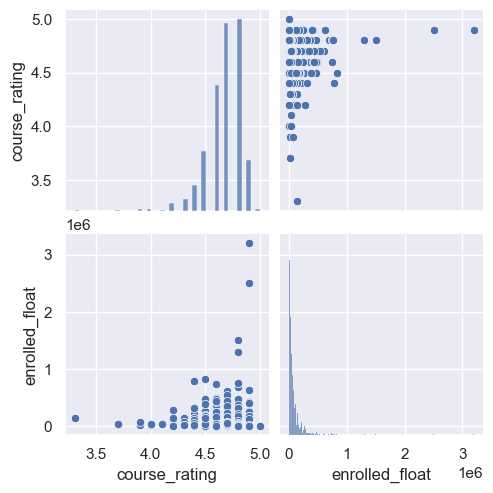

In [20]:
sns.pairplot(df)
plt.show();

In [21]:
df["course_difficulty"].unique()

array(['Beginner', 'Mixed', 'Intermediate', 'Advanced'], dtype=object)

Making a new column where Beginner gets the integer value = 1, Intermediate = 2, Advanced = 3 and mixed = 4

In [22]:
df.sort_index(inplace=True)
df["difficulty_float"] = 11
index = 0
for i in df["course_difficulty"]:
    if i == "Beginner":
        df.at[index, "difficulty_float"] = 1
        index += 1
    elif i == "Intermediate":
        df.at[index, "difficulty_float"] = 2
        index += 1
    elif i == "Advanced":
        df.at[index, "difficulty_float"] = 3
        index += 1
    elif i == "Mixed":
        df.at[index, "difficulty_float"] = 4
        index += 1
df["difficulty_float"].unique()

array([1, 4, 2, 3])

In [23]:
df["course_certificate_type"].unique()

array(['PROFESSIONAL CERTIFICATE', 'SPECIALIZATION', 'COURSE'],
      dtype=object)

Doing the same for certificate type, where Course gets the value = 1, Specialization = 2 and Professional certificate = 3

In [24]:
df.sort_index(inplace=True)
df["certificate_type_float"] = 13
index = 0
for i in df["course_certificate_type"]:
    if i == "COURSE":
        df.at[index, "certificate_type_float"] = 1
        index += 1
    elif i == "SPECIALIZATION":
        df.at[index, "certificate_type_float"] = 2
        index += 1
    elif i == "PROFESSIONAL CERTIFICATE":
        df.at[index, "certificate_type_float"] = 3
        index += 1
df["certificate_type_float"].unique()

array([3, 2, 1])

No obvious correlation between the different columns or from a correlation command in pandas. 

Pairplot with class indication. colored. 

/Users/birgerfurnes/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


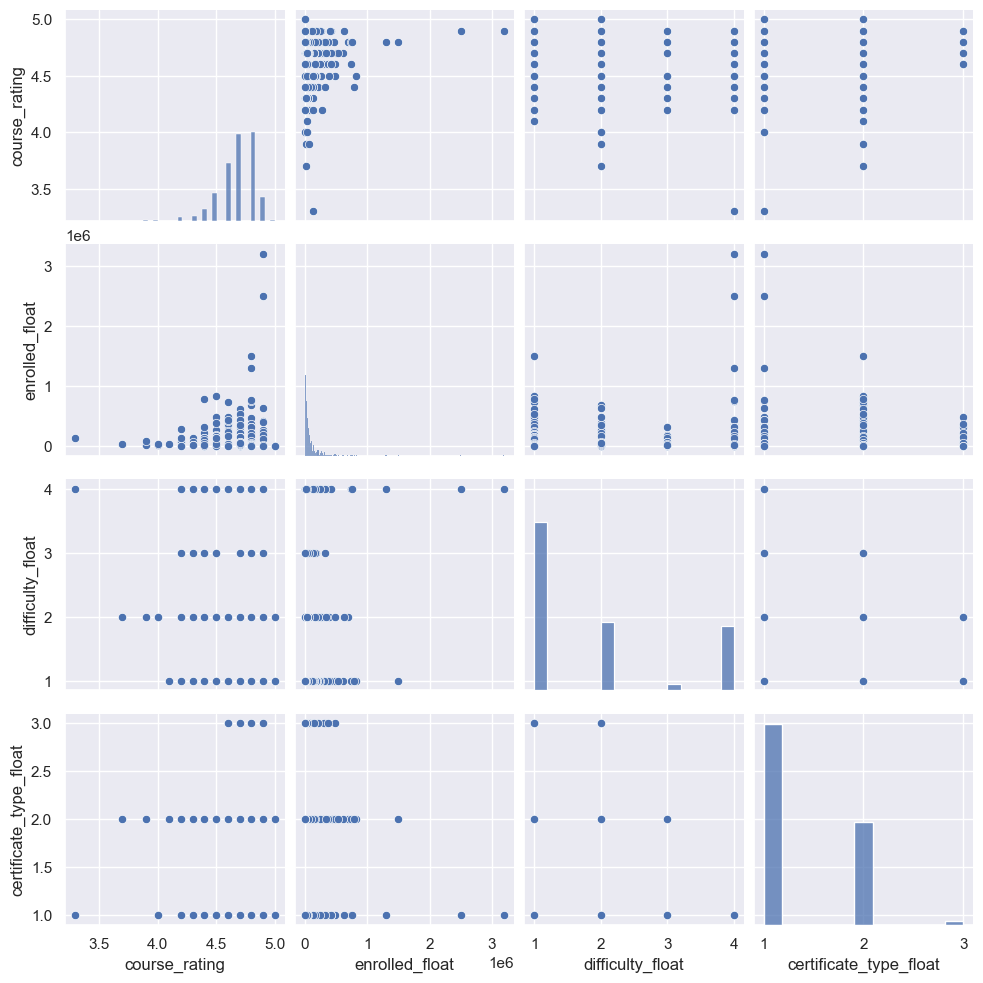

In [25]:
sns.pairplot(df)
plt.show();

Looking further into a correlation with a simple .corr() command, no obvious correlations here either. Somewhat weak negative correlation between certificate type and difficulty

In [26]:
df.corr()

,course_rating,enrolled_float,difficulty_float,certificate_type_float
course_rating,1.000000,0.071090,0.049612,-0.232252
enrolled_float,0.071090,1.000000,0.103599,0.033720
difficulty_float,0.049612,0.103599,1.000000,-0.318504
certificate_type_float,-0.232252,0.033720,-0.318504,1.000000


### Bar/Count plots with text values

Creating a count for course difficulty and count, eg. professional_beginner stores the value of counts of courses where the course is both a professional certificate and has the difficulty of beginner. 

In [27]:
professional_beginner, professional_intermediate = df[
    df["course_certificate_type"] == "PROFESSIONAL CERTIFICATE"
]["course_difficulty"].value_counts()
specialization_beginner, specialization_intermediate, specialization_advanced = df[
    df["course_certificate_type"] == "SPECIALIZATION"
]["course_difficulty"].value_counts()
course_beginner, course_mixed, course_intermediate, course_advanced = df[
    df["course_certificate_type"] == "COURSE"
]["course_difficulty"].value_counts()

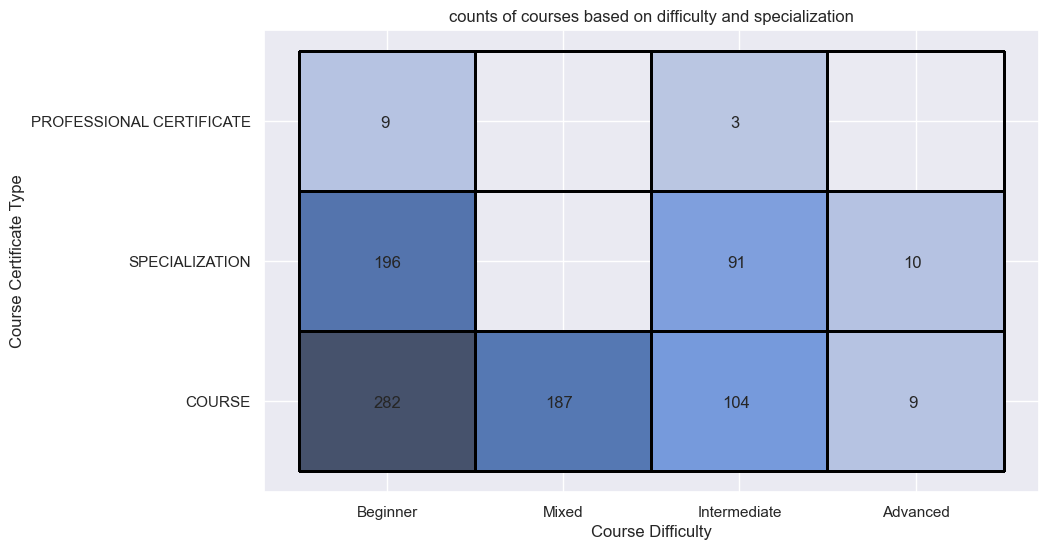

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.histplot(
    data=df,
    x="course_difficulty",
    y="course_certificate_type",
    edgecolor="black",
)

ax.set(
    title="counts of courses based on difficulty and specialization",
    xlabel="Course Difficulty",
    ylabel="Course Certificate Type",
)

ax.text(-0.08, 2.05, course_beginner)
ax.text(0.9, 2.05, course_mixed)
ax.text(1.9, 2.05, course_intermediate)
ax.text(2.96, 2.05, course_advanced)

ax.text(-0.08, 1.05, specialization_beginner)
ax.text(1.93, 1.05, specialization_intermediate)
ax.text(2.93, 1.05, specialization_advanced)

ax.text(-0.04, 0.05, professional_beginner)
ax.text(1.95, 0.05, professional_intermediate)

plt.show();

This can also be used for countplots, barplots and histplots to get text above each bar. 

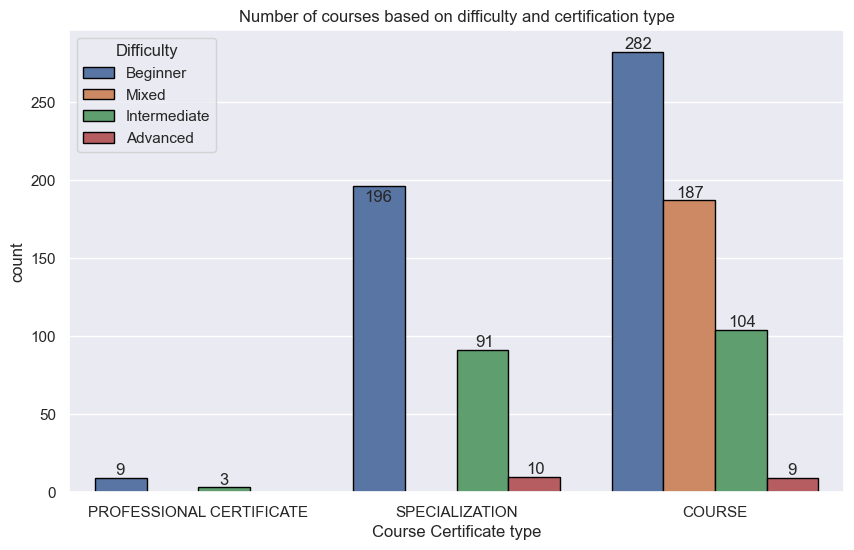

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="course_certificate_type",
    hue="course_difficulty",
    edgecolor="black",
)
ax.set(
    title="Number of courses based on difficulty and certification type",
    xlabel="Course Certificate type",
)

ax.text(1.65, (course_beginner + 2), course_beginner)
ax.text(1.85, (course_mixed + 2), course_mixed)
ax.text(2.05, (course_intermediate + 2), course_intermediate)
ax.text(2.28, (course_advanced + 2), course_advanced)

ax.text(0.64, (specialization_beginner -10), specialization_beginner)
ax.text(1.07, (specialization_intermediate + 2), specialization_intermediate)
ax.text(1.27, (specialization_advanced + 2), specialization_advanced)

ax.text(-0.32, (professional_beginner + 2), professional_beginner)
ax.text(0.08, (professional_intermediate + 2), professional_intermediate)

plt.legend(loc="upper left", title="Difficulty")
plt.show();

However a more convenient way of showing this is by using ax.bar_label() in seaborn to set these values with less work beforehand. However you have less control over the position of the text. 

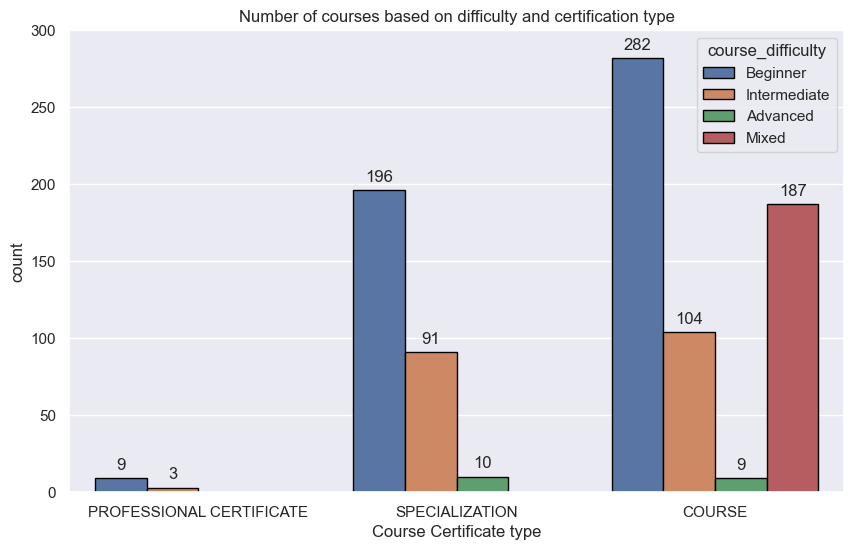

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="course_certificate_type",
    hue="course_difficulty",
    edgecolor="black",
    hue_order=["Beginner", "Intermediate", "Advanced", "Mixed"],
)

ax.set(
    title="Number of courses based on difficulty and certification type",
    xlabel="Course Certificate type",
    ylim=(0, 300),
)

ax.bar_label(ax.containers[0], padding=4)
ax.bar_label(ax.containers[1], padding=4)
ax.bar_label(ax.containers[2], padding=4)
ax.bar_label(ax.containers[3], padding=4)

plt.show();

### Visualizing courses by organization

Many organizations have few courses, while some organizations have many. 

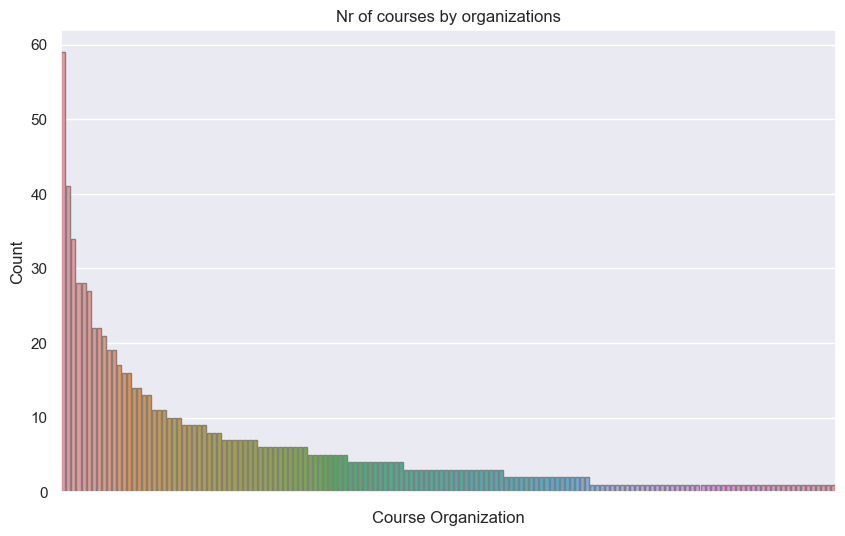

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="course_organization",
    order=df["course_organization"].value_counts().index,
    edgecolor="gray",
)
ax.set(
    xticklabels=[],
    title="Nr of courses by organizations",
    xlabel="Course Organization",
    ylabel="Count",
)

plt.show();

Try a distribution plot to show this more clearly. 

/Users/birgerfurnes/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


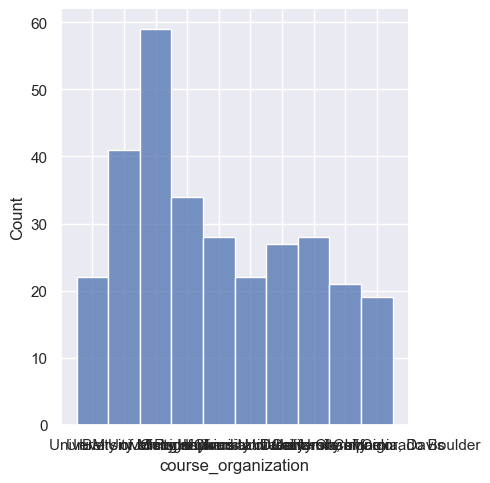

In [69]:
top_10_list = df["course_organization"].value_counts(ascending=False).keys()[0:10]

sns.displot(
    data=df[df["course_organization"].isin(top_10_list)],
    x="course_organization", bins=top_10_list, #hue="course_certificate_type",
)
#y="course_organization",
plt.show();

In [34]:
largest_org = df["course_organization"].value_counts().nlargest(10)
largest_org[0]

59

Top 10 course providers on Coursera

Can quickly be made with matplotlib

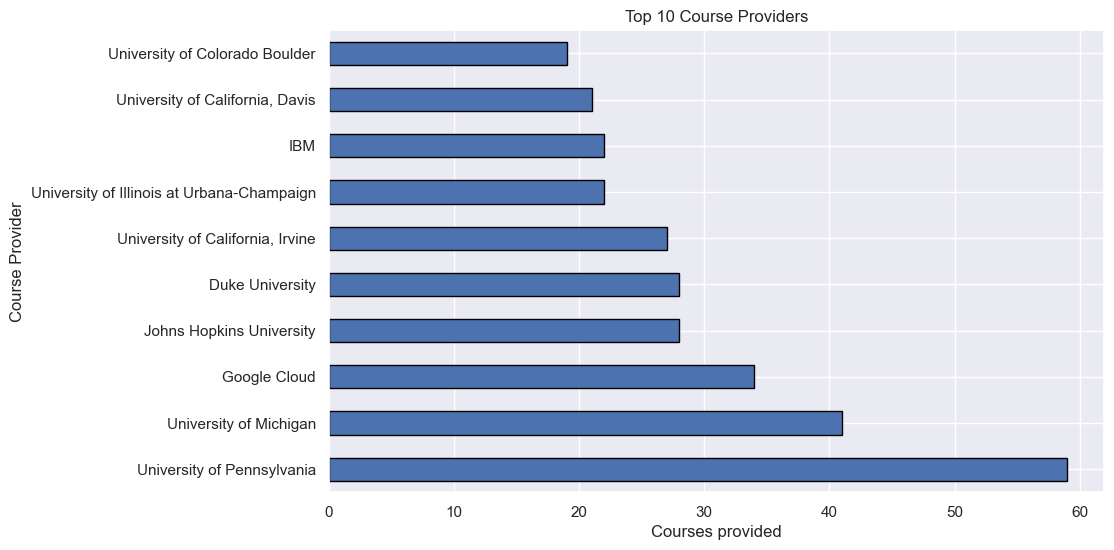

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
largest_org = df["course_organization"].value_counts().nlargest(10)
ax = largest_org.plot(
    kind="barh",
    edgecolor="black",
)
ax.set(
    title="Top 10 Course Providers",
    xlabel="Courses provided",
    ylabel="Course Provider",
)
plt.show();

With a little more work it can also be made in seaborn, with a visual aesthetic I prefer. 

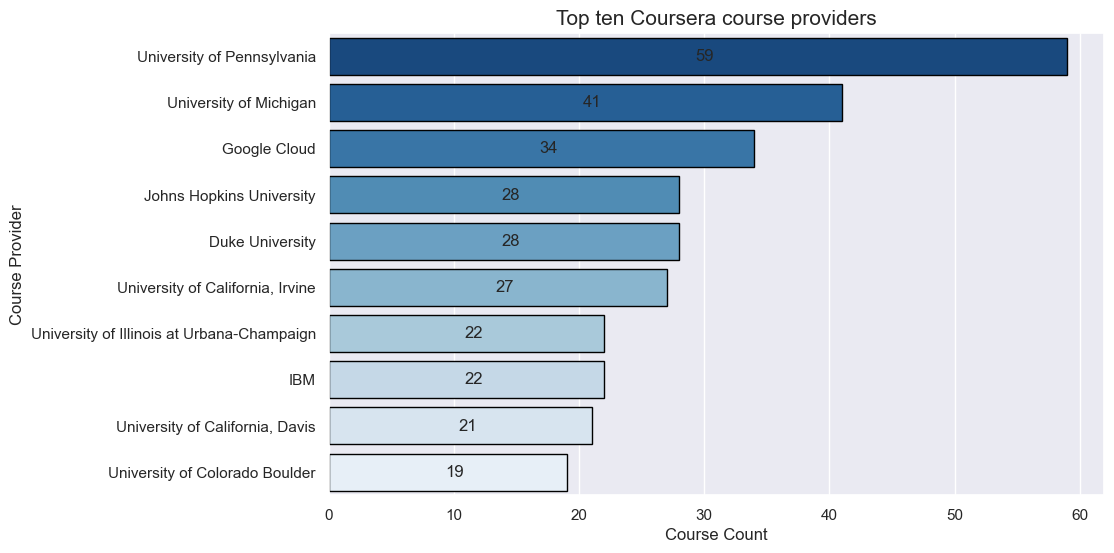

In [36]:
df_largest_org = pd.DataFrame(largest_org)
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(
    data=df_largest_org,
    x="course_organization",
    y=df_largest_org.index,
    edgecolor="black",
    palette="Blues_r",
)
ax.bar_label(
    ax.containers[0],
    fontsize=12,
    label_type="center",
    padding=5,
)

ax.set_title("Top ten Coursera course providers", fontsize=15)
ax.set_xlabel("Course Count", fontsize=12)
ax.set_ylabel("Course Provider", fontsize=12)
plt.show();

### Making plots with course counts based on rating

We can see from below that most courses have a rating between 4.7 and 4.8

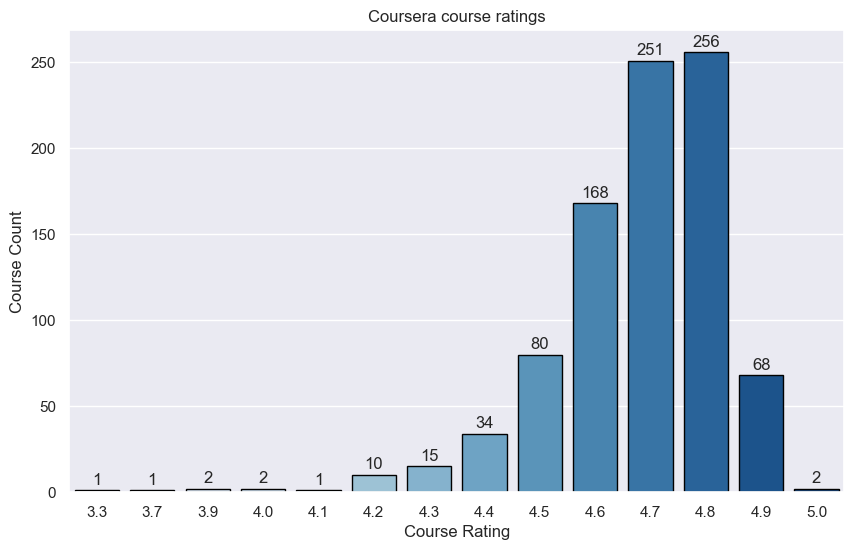

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="course_rating",
    edgecolor="black",
    palette="Blues",
)
ax.set(
    title="Coursera course ratings",
    xlabel="Course Rating",
    ylabel="Course Count",
)
ax.bar_label(ax.containers[0], padding=2)

plt.show();

#### Can further expand on this by setting the hues = other criteria to get more detailed plots

We get some further details using the hue method, where we can see that many of the highly rated courses has a mixed difficulty, while most have a beginner difficulty

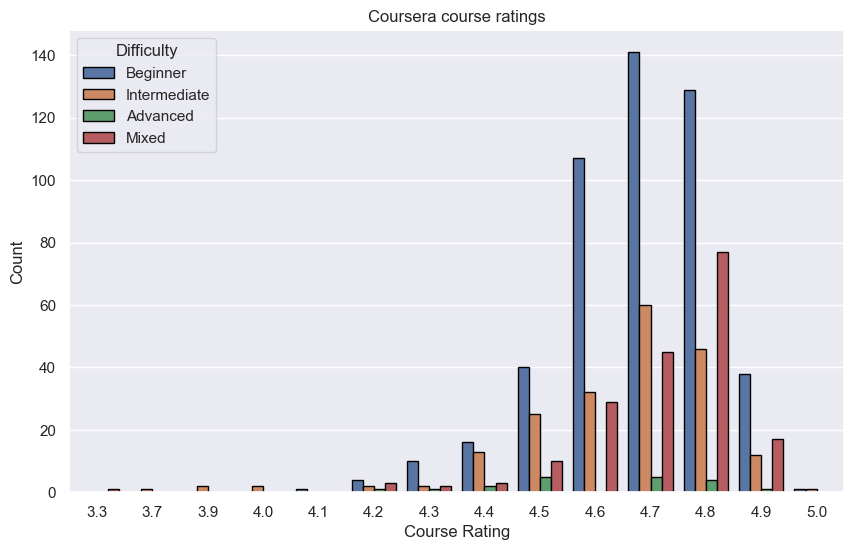

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="course_rating",
    hue="course_difficulty",
    edgecolor="black",
    hue_order=["Beginner", "Intermediate", "Advanced", "Mixed"],
)

ax.set(
    title="Coursera course ratings",
    xlabel="Course Rating",
    ylabel="Count",
)


plt.legend(loc="upper left", title="Difficulty")
plt.show();

#### We can also split the plot into a multiplot based on Course Difficulty

We can more easily see where what rating the advanced courses fall into. These values "drown" in the combined plot

/Users/birgerfurnes/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


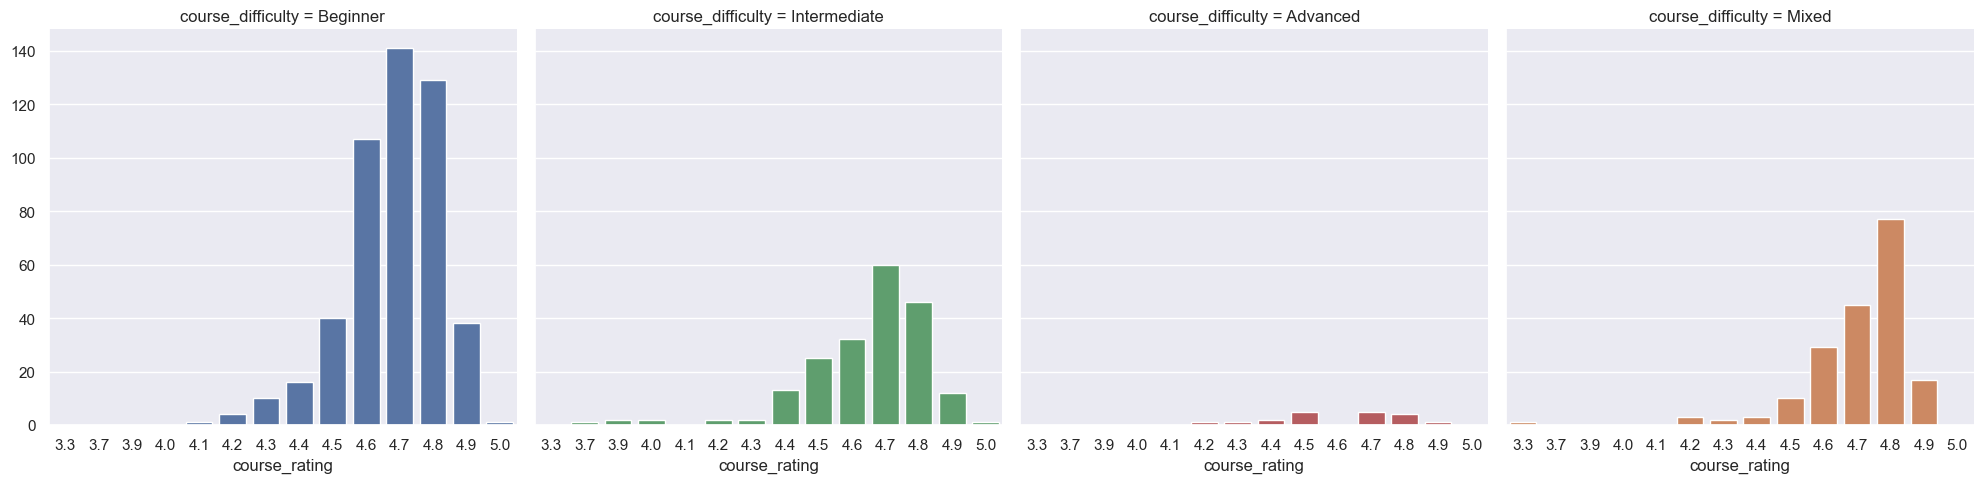

In [39]:
ord_rating = df["course_rating"].unique().tolist()
ord_rating.sort()
g = sns.FacetGrid(
    data=df,
    col="course_difficulty",
    col_order=["Beginner", "Intermediate", "Advanced", "Mixed"],
    height=5,
    aspect=1,
    hue="course_difficulty",
)
g.map(sns.countplot, "course_rating", order=ord_rating)


plt.show();

### Or stack the bars on top of one another. 



/Users/birgerfurnes/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


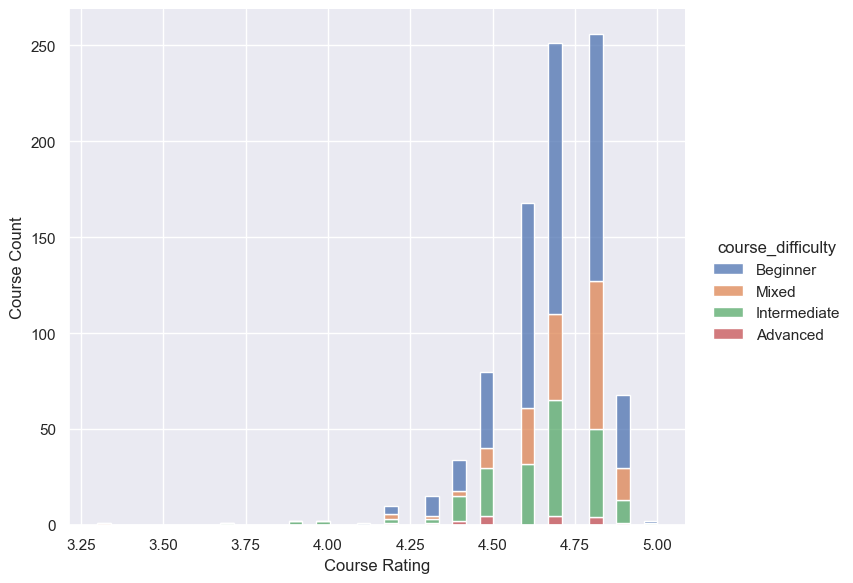

In [40]:
g = sns.displot(
    data=df,
    x="course_rating",
    hue="course_difficulty",
    multiple="stack",
    col_order=["Beginner", "Intermediate", "Advanced", "Mixed"],
    height=6,
    aspect=1.2,
)
# ax.bar_label(ax.containers[0], padding=2)
g.set_axis_labels("Course Rating", "Course Count")
plt.show();

##### Most of the highly rated courses are of certificate type = Course. 

Note: Most courses are beginner and of certificate type = Course. They are over represented compared to other criteria mixes. However we can see a trend in the plot below, where "Course" courses has a peak at 4.8 while "Specializations" peak at 4.7

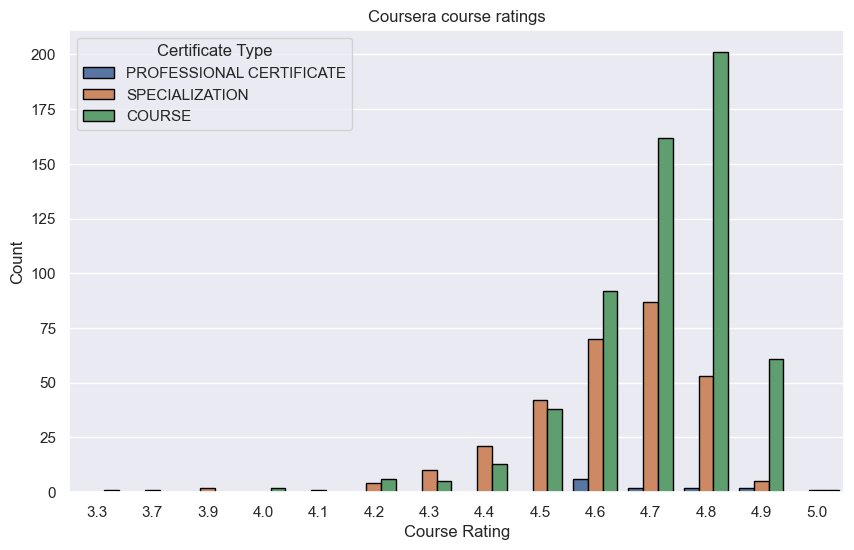

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="course_rating",
    hue="course_certificate_type",
    edgecolor="black",
)
ax.set(
    title="Coursera course ratings",
    xlabel="Course Rating",
    ylabel="Count",
)
plt.legend(loc="upper left", title="Certificate Type")
plt.show();

### JointPlot and JointGrid

Creating a JointPlot first, these plots can give a lot of information. Looking at the marginal plots we can see the range in which most of the data falls within. 

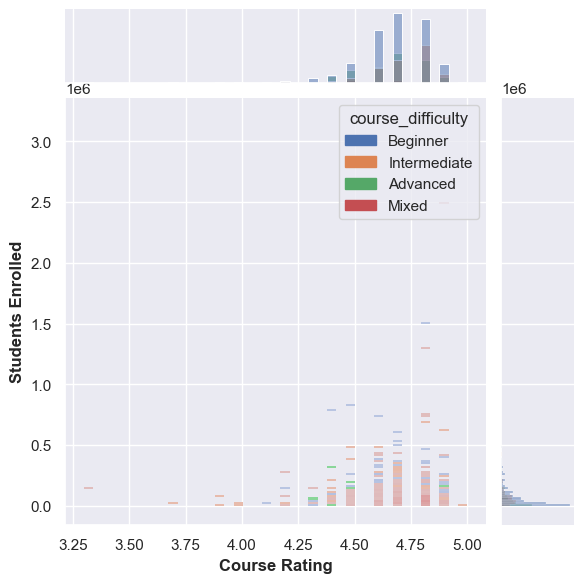

In [42]:
g = sns.jointplot(
    data=df,
    x="course_rating",
    y="enrolled_float",
    kind="hist",
    hue="course_difficulty",
    hue_order=["Beginner", "Intermediate", "Advanced", "Mixed"],
)
g.ax_joint.set_xlabel("Course Rating", fontweight="bold")
g.ax_joint.set_ylabel("Students Enrolled", fontweight="bold")


plt.show();

##### Can create a similar plot with JoinGrid with a little bit more work but more control over the plot

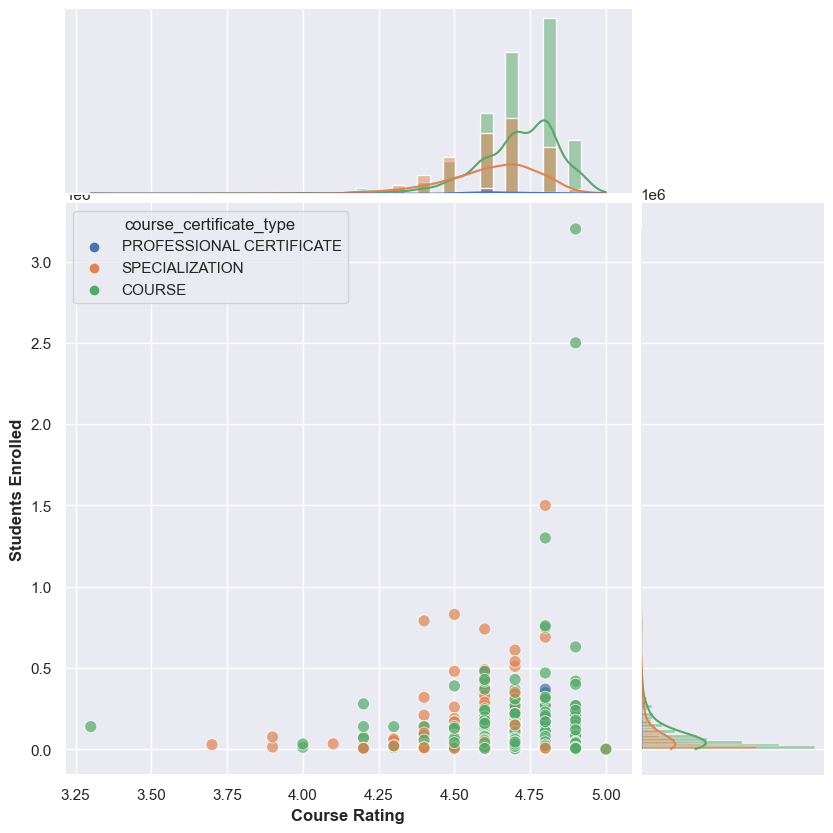

In [43]:
g = sns.JointGrid(
    data=df,
    x="course_rating",
    y="enrolled_float",
    hue="course_certificate_type",
    height=8.5,
    ratio=3,
    space=0.05,
)
g.ax_joint.set_xlabel("Course Rating", fontweight="bold")
g.ax_joint.set_ylabel("Students Enrolled", fontweight="bold")
g.plot_joint(sns.scatterplot, s=75, alpha=0.7)
g.plot_marginals(sns.histplot, kde=True)

plt.show();

##### By limiting the y-axis to (0,800_000) we can get a more detailed overview over the data withing this range. As these datapoints are more compressed in the plot above because of the more extreme values closer too 3_000_000

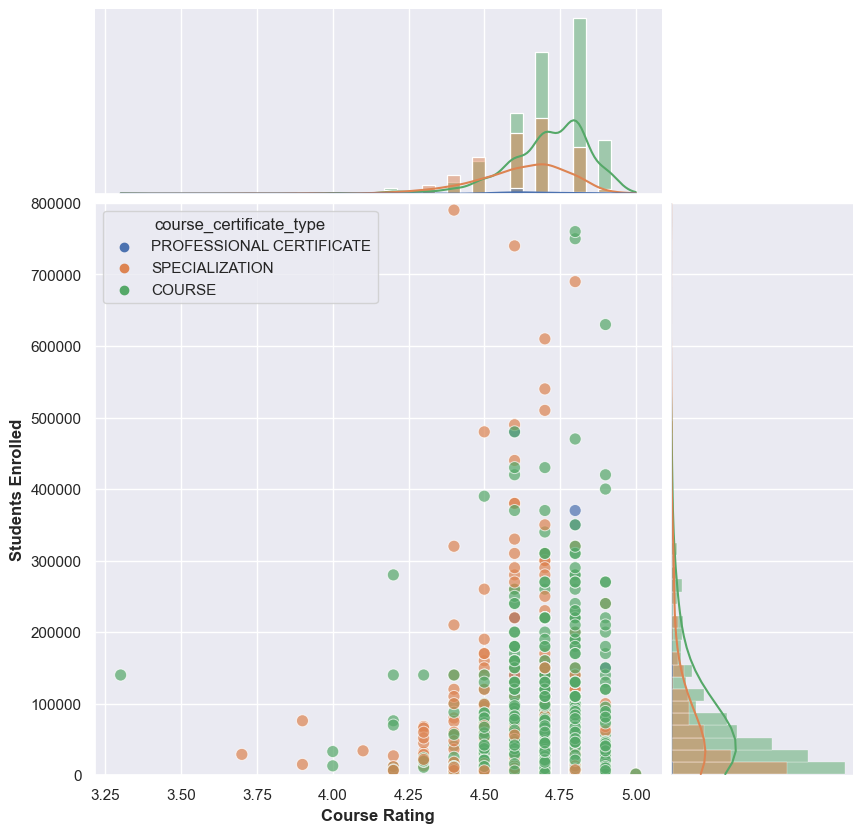

In [44]:
g = sns.JointGrid(
    data=df,
    x="course_rating",
    y="enrolled_float",
    hue="course_certificate_type",
    height=8.5,
    ratio=3,
    space=0.05,
)
g.ax_joint.set_xlabel("Course Rating", fontweight="bold")
g.ax_joint.set_ylabel("Students Enrolled", fontweight="bold")
g.plot_joint(sns.scatterplot, s=75, alpha=0.7)
g.plot_marginals(sns.histplot, kde=True)
g.ax_joint.set(ylim=(0, 800_000))

plt.show();

#### Making a new data set from the original dataset, focusing on the top ten course providers

This data set is used to create a scatterplot to visualize the relationship between Total Courses and Total students Enrolled for each of the top Ten Course providers.

In [45]:
large_org_list = df["course_organization"].value_counts().nlargest(10).index.to_list()
large_org_list

['University of Pennsylvania',
 'University of Michigan',
 'Google Cloud',
 'Johns Hopkins University',
 'Duke University',
 'University of California, Irvine',
 'University of Illinois at Urbana-Champaign',
 'IBM',
 'University of California, Davis',
 'University of Colorado Boulder']

In [46]:
large_org_list = df["course_organization"].value_counts().nlargest(10).index.to_list()
large_org_list_course_count = (
    df["course_organization"].value_counts().nlargest(10).to_list()
)
sum_list = []
mean_list = []
median_list = []
dic_test = {}
for i in large_org_list:
    sum_list.append(df[df["course_organization"] == i]["enrolled_float"].sum())
for i in large_org_list:
    mean_list.append(df[df["course_organization"] == i]["enrolled_float"].mean())
for i in large_org_list:
    median_list.append(df[df["course_organization"] == i]["enrolled_float"].median())

dic_test["org"] = large_org_list
dic_test["sum"] = sum_list
dic_test["mean"] = mean_list
dic_test["median"] = median_list
dic_test["course_count"] = large_org_list_course_count

df_largest_org = pd.DataFrame.from_dict(dic_test)

for i in large_org_list:
    index = large_org_list.index(i)
    print(
        f"organization: {large_org_list[index]}, course count: {large_org_list_course_count[index]}, sum: {sum_list[index]}, mean: {mean_list[index]}, median: {median_list[index]}"
    )

organization: University of Pennsylvania, course count: 59, sum: 5501300, mean: 93242.37288135593, median: 40000.0
organization: University of Michigan, course count: 41, sum: 7437700, mean: 181407.31707317074, median: 59000.0
organization: Google Cloud, course count: 34, sum: 2604300, mean: 76597.05882352941, median: 30000.0
organization: Johns Hopkins University, course count: 28, sum: 4298900, mean: 153532.14285714287, median: 59500.0
organization: Duke University, course count: 28, sum: 3967600, mean: 141700.0, median: 135000.0
organization: University of California, Irvine, course count: 27, sum: 4326000, mean: 160222.22222222222, median: 79000.0
organization: University of Illinois at Urbana-Champaign, course count: 22, sum: 1679000, mean: 76318.18181818182, median: 56000.0
organization: IBM, course count: 22, sum: 2956400, mean: 134381.81818181818, median: 110000.0
organization: University of California, Davis, course count: 21, sum: 1278700, mean: 60890.47619047619, median: 560

### Tried to make arrows to each data point using a for loop. As seen below it was not success, However a more tedious workaround can be seen under "For Stakeholders" Further below. 

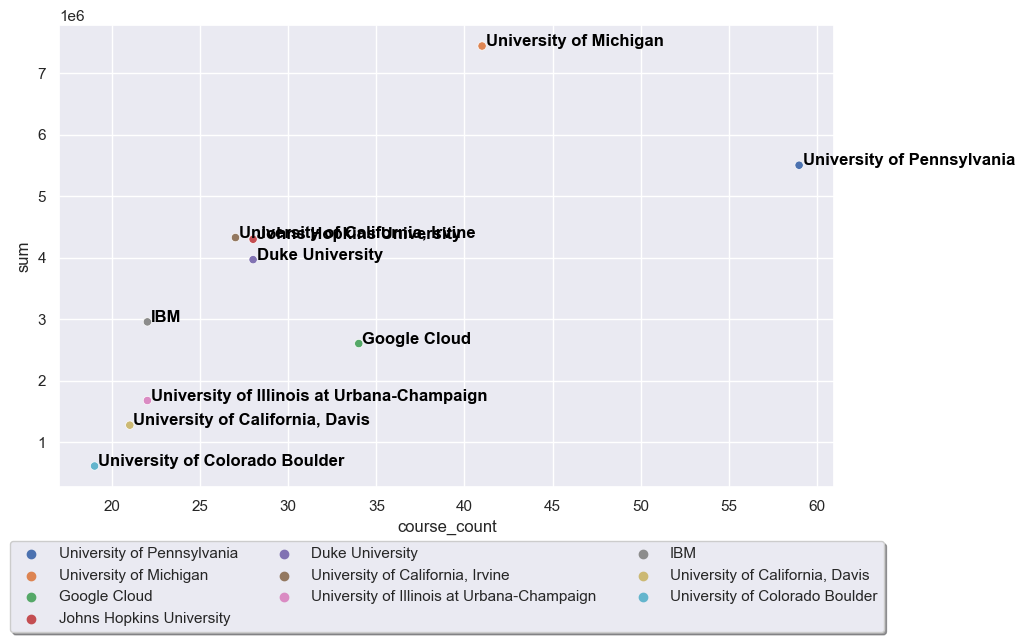

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(
    data=df_largest_org,
    x="course_count",
    y="sum",
    hue="org",
    legend=True,
)

ax.legend(
    loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, fancybox=True, shadow=True
)

for line in range(0, df_largest_org.shape[0]):
    ax.text(
        df_largest_org["course_count"][line] + 0.2,
        df_largest_org["sum"][line],
        df_largest_org["org"][line],
        horizontalalignment="left",
        size="medium",
        color="black",
        weight="semibold",
    )

# Part 3: For "Stake Holders"

What is important to convey from the EDA and Visual analysis ?



### First Plot: Course count and top ten course providers

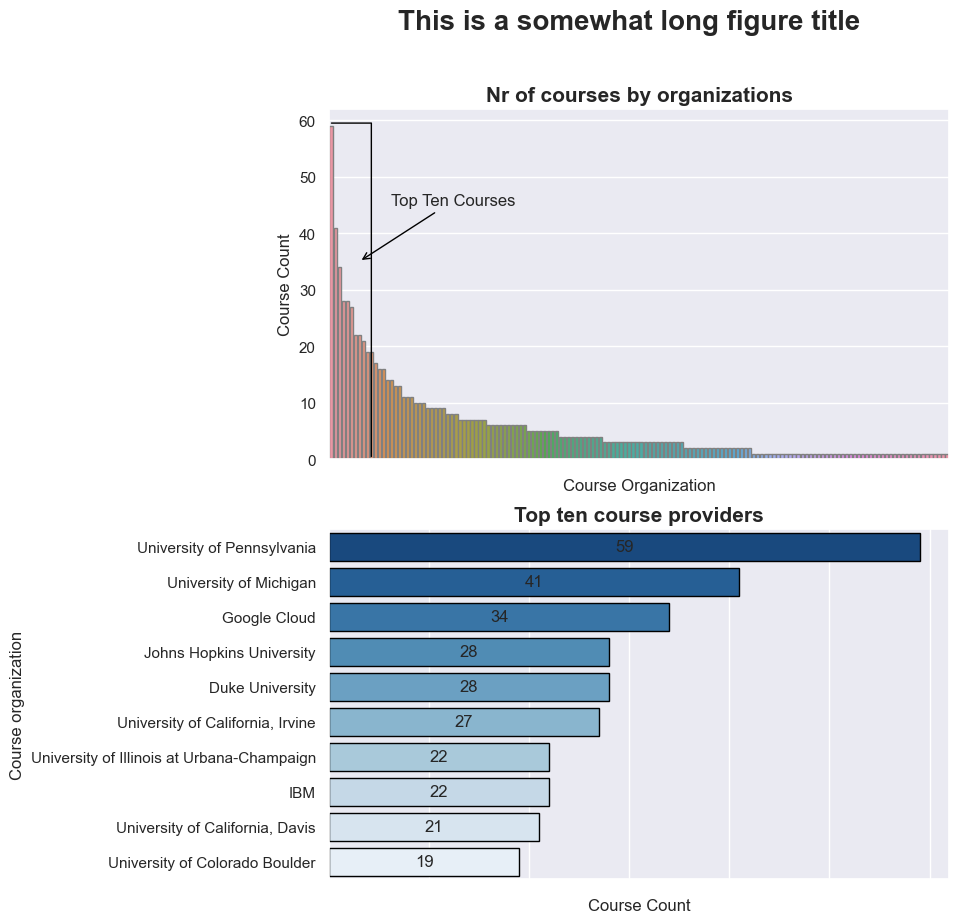

In [48]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharey=False)

fig.suptitle("This is a somewhat long figure title", fontsize=20, fontweight="bold")

sns.countplot(
    ax=axes[0],
    data=df,
    x="course_organization",
    order=df["course_organization"].value_counts().index,
    edgecolor="gray",
)

sns.barplot(
    ax=axes[1],
    data=df_largest_org,
    x="course_count",
    y="org",
    edgecolor="black",
    palette="Blues_r",
)
# Plot 1 labels
axes[0].set(
    xticklabels=[],
    xlabel="Course Organization",
    ylabel="Course Count",
)
axes[0].set_title(
    label="Nr of courses by organizations", fontsize=15, fontweight="bold"
)

# Plot 2 labels
axes[1].set(
    xticklabels=[],
    xlabel="Course Count",
    ylabel="Course organization",
)
axes[1].set_title(label="Top ten course providers", fontsize=15, fontweight="bold")

axes[1].bar_label(
    axes[1].containers[0],
    fontsize=12,
    label_type="center",
    padding=0,
)

# Arrows and lines
axes[0].annotate(
    "", xy=(10, 0), xytext=(10, 60), arrowprops=dict(arrowstyle="-", color="black")
)
axes[0].annotate(
    "",
    xy=(-0.6, 59.5),
    xytext=(10.5, 59.5),
    arrowprops=dict(arrowstyle="-", color="black"),
)
axes[0].annotate(
    "Top Ten Courses",
    xy=(7, 35),
    xytext=(15, 45),
    arrowprops=dict(arrowstyle="->", color="black"),
)
plt.show();

In [49]:
df.head(1)

,course_title,course_organization,course_certificate_type,course_rating,course_difficulty,course_students_enrolled,enrolled_float,difficulty_float,certificate_type_float
nr,,,,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k,480000,1,3


In [50]:
df["enrolled_float"].sum()

80681900

### Plot 2: Focusing on relation between the amounts of Courses provided and the total amount of students enrolled across all courses provided by the top ten course providers

A bit messy with all the arrows, would trim it for real stakeholders, however this is for study purposes and it illustrates how customizable seaborn and matplotlib can be. 

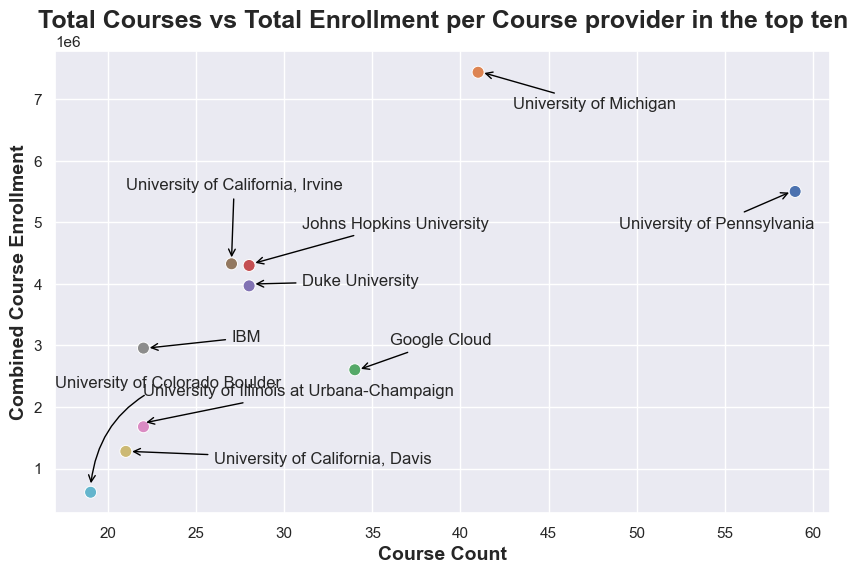

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(
    data=df_largest_org,
    x="course_count",
    y="sum",
    hue="org",
    legend=False,
    s=75,
)

ax.set_xlabel("Course Count", fontsize=14, fontweight="bold")
ax.set_ylabel("Combined Course Enrollment", fontsize=14, fontweight="bold")
ax.set_title(
    "Total Courses vs Total Enrollment per Course provider in the top ten",
    fontsize=18,
    fontweight="bold",
)

ax.annotate(  # University of Pennsylvania
    df_largest_org["org"][0],
    xy=((df_largest_org["course_count"][0] - 0.2), df_largest_org["sum"][0]),
    xytext=(
        (df_largest_org["course_count"][0] - 10),
        df_largest_org["sum"][0] - 600000,
    ),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # University of Michigan
    df_largest_org["org"][1],
    xy=((df_largest_org["course_count"][1] + 0.2), df_largest_org["sum"][1]),
    xytext=((df_largest_org["course_count"][1] + 2), df_largest_org["sum"][1] - 600000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # Google Cloud
    df_largest_org["org"][2],
    xy=((df_largest_org["course_count"][2] + 0.2), df_largest_org["sum"][2]),
    xytext=((df_largest_org["course_count"][2] + 2), df_largest_org["sum"][2] + 400000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # John Hopkins University
    df_largest_org["org"][3],
    xy=((df_largest_org["course_count"][3] + 0.2), df_largest_org["sum"][3] + 30000),
    xytext=((df_largest_org["course_count"][3] + 3), df_largest_org["sum"][3] + 600000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # Duke University
    df_largest_org["org"][4],
    xy=((df_largest_org["course_count"][4] + 0.2), df_largest_org["sum"][4] + 30000),
    xytext=((df_largest_org["course_count"][4] + 3), df_largest_org["sum"][4]),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # University of California, Irvine
    df_largest_org["org"][5],
    xy=((df_largest_org["course_count"][5]), df_largest_org["sum"][5] + 60000),
    xytext=(
        (df_largest_org["course_count"][5] - 6),
        df_largest_org["sum"][5] + 1200000,
    ),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # IBM
    df_largest_org["org"][6],
    xy=((df_largest_org["course_count"][6]), df_largest_org["sum"][6] + 60000),
    xytext=((df_largest_org["course_count"][6]), df_largest_org["sum"][6] + 500000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # University of Illinois at Urbana-Champaign
    df_largest_org["org"][7],
    xy=((df_largest_org["course_count"][7] + 0.2), df_largest_org["sum"][7]),
    xytext=((df_largest_org["course_count"][7] + 5), df_largest_org["sum"][7] + 100000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # University of California, Davis
    df_largest_org["org"][8],
    xy=((df_largest_org["course_count"][8] + 0.2), df_largest_org["sum"][8]),
    xytext=((df_largest_org["course_count"][8] + 5), df_largest_org["sum"][8] - 200000),
    arrowprops=dict(arrowstyle="->", color="black"),
)

ax.annotate(  # University of Virginia
    df_largest_org["org"][9],
    xy=((df_largest_org["course_count"][9]), df_largest_org["sum"][9] + 100000),
    xytext=(
        (df_largest_org["course_count"][9] - 2),
        df_largest_org["sum"][9] + 1700000,
    ),
    arrowprops=dict(arrowstyle="->", color="black", connectionstyle="arc3,rad=0.3"),
)
plt.show();

### Plot 3: Relationship Between Course Rating and Course Enrollment.

This plot is more on the technical side and would not be beneficial to show to everyone. However it gives detailed insight into where most courses fall on rating and in student enrollment. 

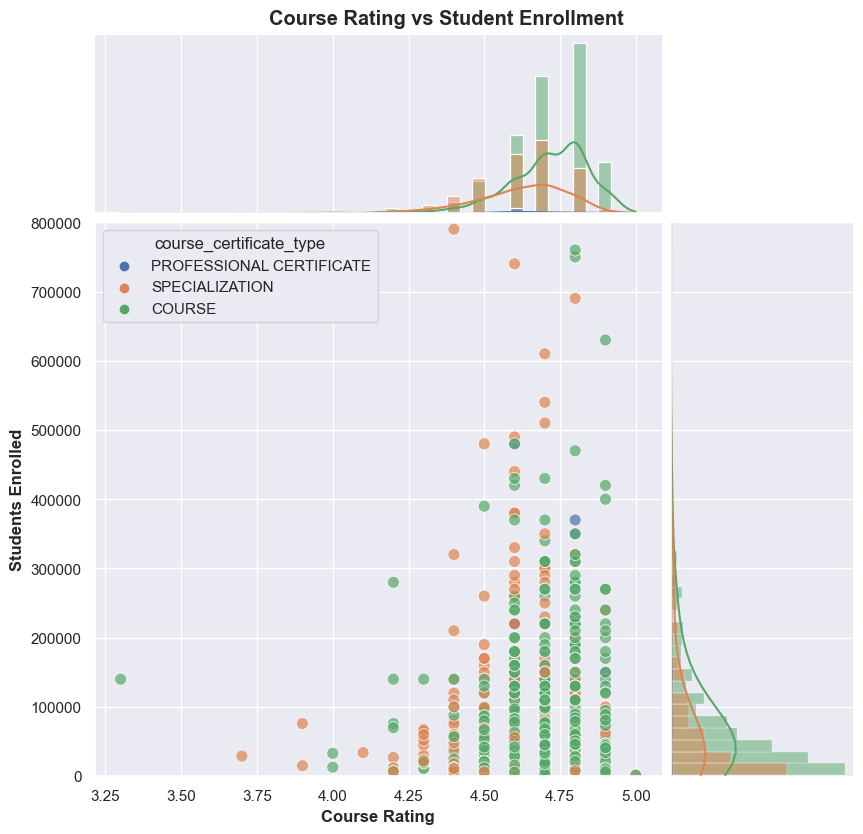

In [52]:
g = sns.JointGrid(
    data=df,
    x="course_rating",
    y="enrolled_float",
    hue="course_certificate_type",
    height=8.5,
    ratio=3,
    space=0.05,
)
g.ax_joint.set_xlabel("Course Rating", fontweight="bold")
g.ax_joint.set_ylabel("Students Enrolled", fontweight="bold")
g.fig.suptitle("Course Rating vs Student Enrollment", fontweight="bold")
g.fig.subplots_adjust(top=0.95)
g.plot_joint(sns.scatterplot, s=75, alpha=0.7)
g.plot_marginals(sns.histplot, kde=True)
g.ax_joint.set(ylim=(0, 800_000))

plt.show();